In [2]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import pandas as pd
import numpy as np

In [4]:

#Load the Boston Dataset
#boston = load_boston()
#x = boston.data
#y = boston.target
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
x = np.hstack([raw_df.to_numpy()[::2, :], raw_df.to_numpy()[1::2, :2]])
y = raw_df.to_numpy()[1::2, 2]

In [5]:
df = pd.DataFrame(data=x)
type(df)
df.describe

<bound method NDFrame.describe of           0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

     

In [6]:
# Create a Linear Regression Model
lr = linear_model.LinearRegression()

In [7]:
# Prediction Model
predicted = cross_val_predict(lr, x, y, cv=10)

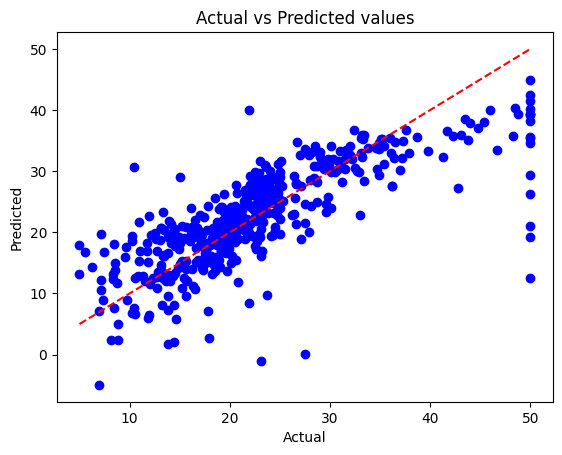

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y, predicted, color='blue', label='Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae, mse, rmse, r2)

3.6072034251545233 31.09805237793559 5.576562774499682 0.7288845054464685
